# PCA and Clustering Practice - All Kinds of Unsupervised Learning!

Today we'll be practicing clustering and PCA... using image data! The MNIST digit dataset is an example dataset loaded in sklearn ([see here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)). The dataset contains 1797 handwritten digits, 0-10, as 8x8 pixel images. Each pixel is a column with a value, 0-16, indiciating the strength of the pixel.

The inspiration for using this dataset, as well as credited chunks of code, come from [this book, the Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do)

In [60]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For the very last chunk of code from sklearn:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [2]:
digits = load_digits()

In [3]:
# If we look at the data...
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [57]:
# If we look at the data as a pandas dataframe...
X = pd.DataFrame(digits.data)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


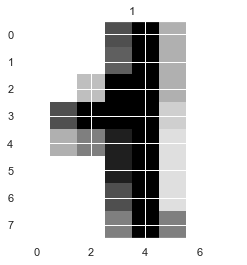

In [47]:
# An example of one of the digits (change the row to see different ones)
# Using matplotlib's imshow: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html

row = 93

plt.imshow(digits.images[row], cmap=plt.cm.binary)
plt.title(str(digits.target[row]))
plt.show()

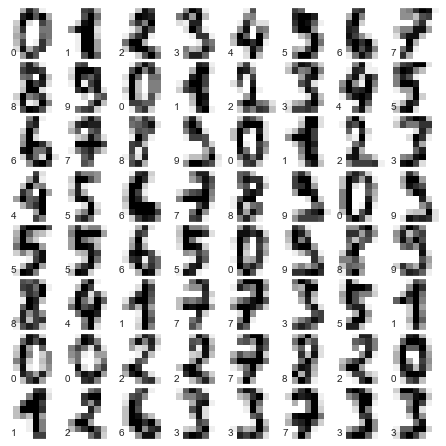

In [6]:
# Let's look at the first 64 images, with their labels
# Code from https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html#Example:-Random-Forest-for-Classifying-Digits

# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [61]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=42)

In [65]:
# How hard is this problem? Let's run a quick model to see...
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [66]:
# Let's analyze our multi-class classification:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       0.97      0.97      0.97        37
           2       1.00      0.97      0.99        39
           3       0.96      1.00      0.98        44
           4       1.00      0.98      0.99        56
           5       0.98      0.95      0.97        61
           6       0.98      0.98      0.98        45
           7       0.98      0.98      0.98        41
           8       0.97      0.97      0.97        38
           9       0.96      0.98      0.97        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



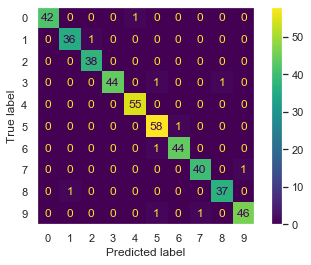

In [67]:
metrics.plot_confusion_matrix(rfc, X_test, y_test)
plt.grid(False)
plt.show()

## Principal Component Analysis

![pca gif saved from learnco](pca.gif)

What does PCA even do? Let's describe it:

- 


Useful resources as part of this discussion:

- https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/
- https://www.theanalysisfactor.com/pca-for-reducing-predictors-and-response-variables/


In [44]:
# Let's explore!
pca = PCA(random_state = 42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

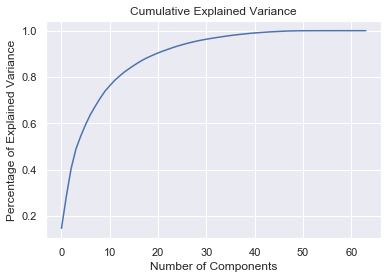

In [45]:
# Let's explore how the components explain the variance in the data
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Explained Variance')
plt.show()

One way to explore what PCA does:

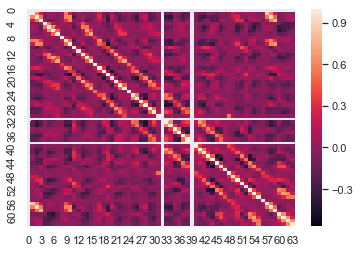

In [13]:
# Before
sns.heatmap(pd.DataFrame(X_train).corr())
plt.show()

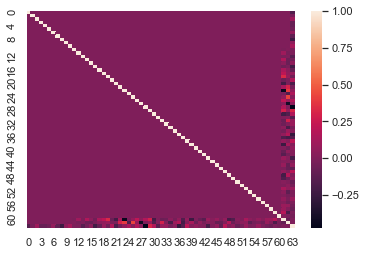

In [14]:
# After
X_train_pca = pca.transform(X_train)
sns.heatmap(pd.DataFrame(X_train_pca).corr())
plt.show()

So what did we do? What did PCA help with?

- 


-----

How many components would it take to explain 90% of the variance? We could guess using the above plot, or...

In [15]:
pca_90 = PCA(n_components=0.9, random_state = 42)
pca_90.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
pca_90.n_components_

21

-----

Another use of PCA is visualization - let's see if we can see the differences between our 10 classes if we go all the way down to 2 components.

In [33]:
pca_2 = PCA(n_components=2, random_state = 42)
X_train_2components = pca_2.fit_transform(X_train)

In [34]:
# To compare:
print(X_train.shape)
print(X_train_2components.shape)

(1347, 64)
(1347, 2)


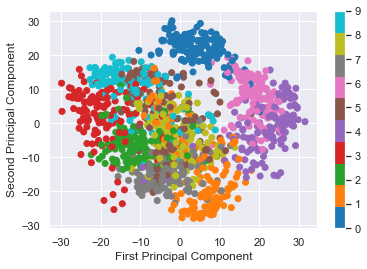

In [35]:
plt.scatter(X_train_2components[:, 0],  # x axis is all rows, first column
            X_train_2components[:, 1],  # y axis is all rows, second column
            c=y_train,  # coloring the dots with the actual labels
            cmap='tab10') # getting a color map with 10 distinct colors
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.colorbar()
plt.show()

Let's discuss!

- 


-----

And now - can we model with just 2 components?

In [36]:
# Transforming our X_test using the same pca_2 we fit on the training data
X_test_2components = pca_2.transform(X_test)

rfc_pca = RandomForestClassifier(n_estimators=1000)
rfc_pca.fit(X_train_2components, y_train)
y_pred_pca = rfc_pca.predict(X_test_2components)

In [39]:
# Let's analyze our multi-class classification:
print(metrics.classification_report(y_pred_pca, y_test))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        46
           1       0.57      0.51      0.54        41
           2       0.63      0.57      0.60        42
           3       0.76      0.80      0.78        44
           4       0.78      0.88      0.83        49
           5       0.31      0.40      0.35        45
           6       0.82      0.76      0.79        49
           7       0.51      0.49      0.50        43
           8       0.32      0.23      0.27        52
           9       0.56      0.69      0.62        39

    accuracy                           0.62       450
   macro avg       0.62      0.62      0.61       450
weighted avg       0.62      0.62      0.61       450



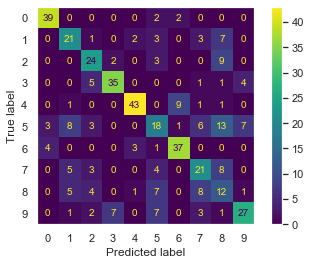

In [38]:
metrics.plot_confusion_matrix(rfc_pca, X_test_2components, y_test)
plt.grid(False)
plt.show()

Let's interpret...

- 


## K-Means Clustering

![k-means gif saved from learnco](kmeans.gif)

What does the K-Means clustering algorithm even do? Let's describe the steps:

- 


Here, we know there are 10 distinct classes in our data - 10 digits represented. The author of the Python Data Science Handbook visualized the clusters that that the k-means algorithm finds if we feed in `n_clusters=10`:

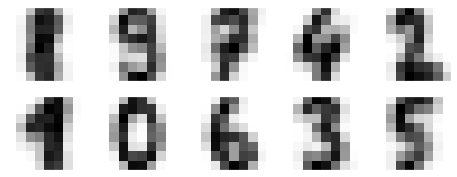

In [20]:
# Code from: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(X_train)
kmeans.cluster_centers_.shape

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Let's interpret: what does it do well at clustering? Where does it struggle?

- 


-----

What if we don't know the number of clusters? We can use a for-loop (or a function) to try many different numbers for `k`, then use a scoring metric like the silhouette score to see how well they do!

Silhouette score documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score).

What is a Silhouette score? From SKLearn:

> "The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]."

In [21]:
silhouette_scores = [] # Creating a list to hold our scores
k_values = range(2, 13) # Creating the range, 2-12, of values to try for k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_train)
    labels = kmeans.labels_ # Grab each row's predicted label
    # The score needs the x variables as well as predicted labels
    score = silhouette_score(X_train, labels)
    print(f"For n_clusters = {k}, the silhouette score is: {score}.")
    silhouette_scores.append(score)

For n_clusters = 2, the silhouette score is: 0.11824305289209779.
For n_clusters = 3, the silhouette score is: 0.12658871422247353.
For n_clusters = 4, the silhouette score is: 0.13403804347997159.
For n_clusters = 5, the silhouette score is: 0.13821667911387647.
For n_clusters = 6, the silhouette score is: 0.151428287205013.
For n_clusters = 7, the silhouette score is: 0.16060889100536915.
For n_clusters = 8, the silhouette score is: 0.17669660150057825.
For n_clusters = 9, the silhouette score is: 0.19003026494288872.
For n_clusters = 10, the silhouette score is: 0.183419799171199.
For n_clusters = 11, the silhouette score is: 0.18431337419644322.
For n_clusters = 12, the silhouette score is: 0.18240870185654537.


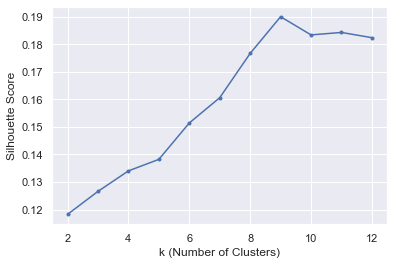

In [22]:
# Let's visualize how our silhouette scores change as we increase k
plt.plot(k_values, silhouette_scores, marker='.')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Silhouette Score')
plt.show()

Let's interpret!

- 


If we wanted to automate this process, how could we write a function that spits out the optimal number of clusters, given the data?

In [48]:
def find_optimal_k(arguments):
    pass

-----


Another way to look at silhouette scores is to visualize the silhouette plots! To do so, we'll actually use our PCA data for `n_components = 2` - remember, we have that saved as the variable `X_train_2components`.

In [32]:
X_train_2components.shape

(1347, 2)

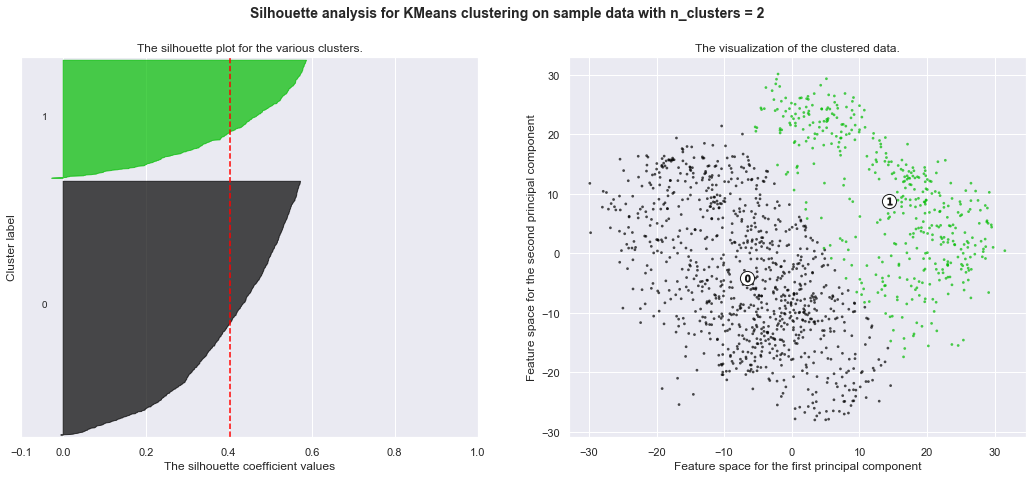

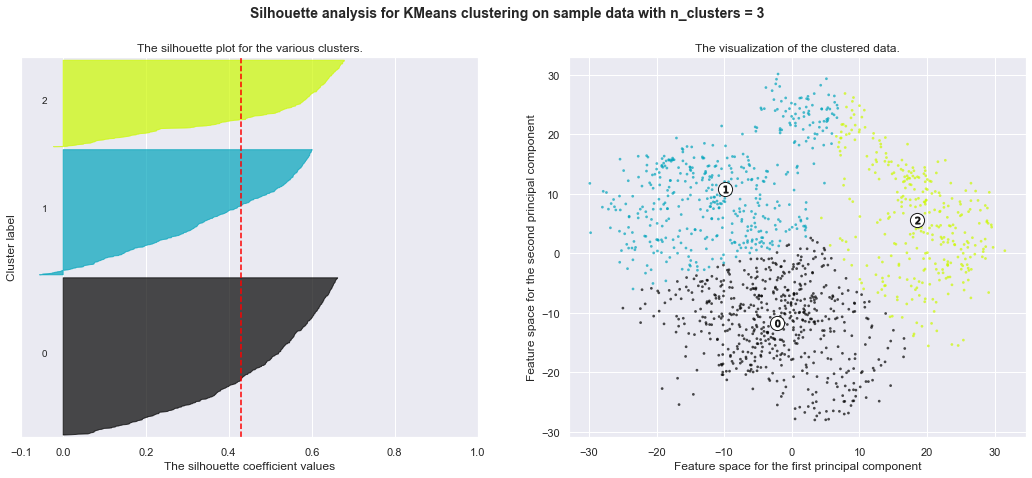

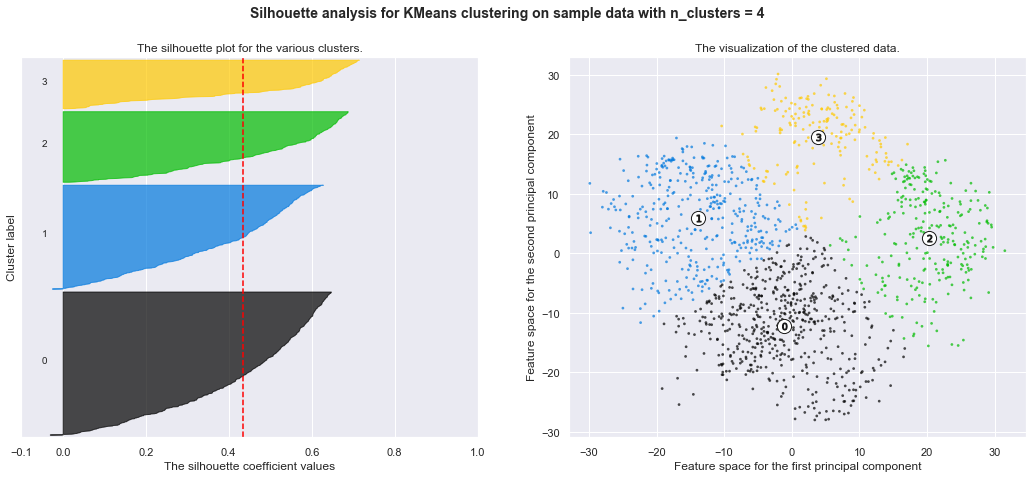

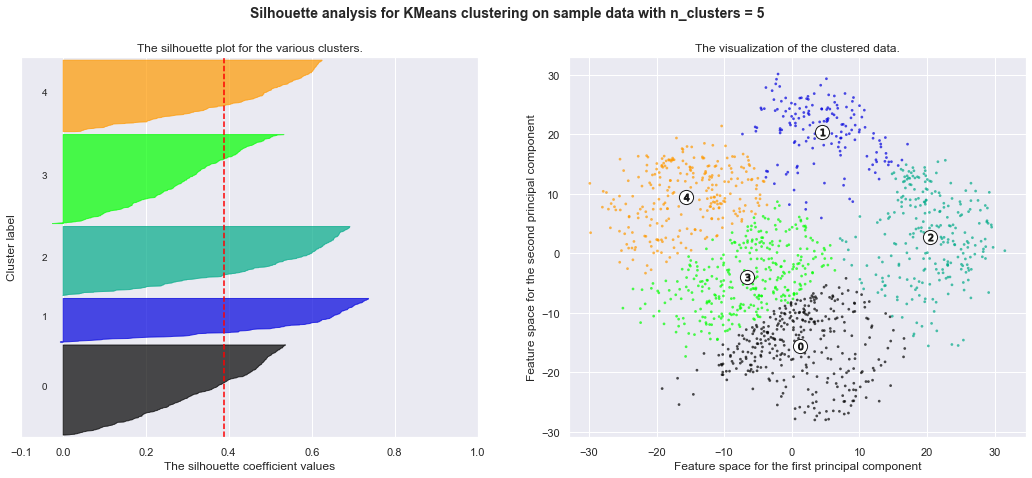

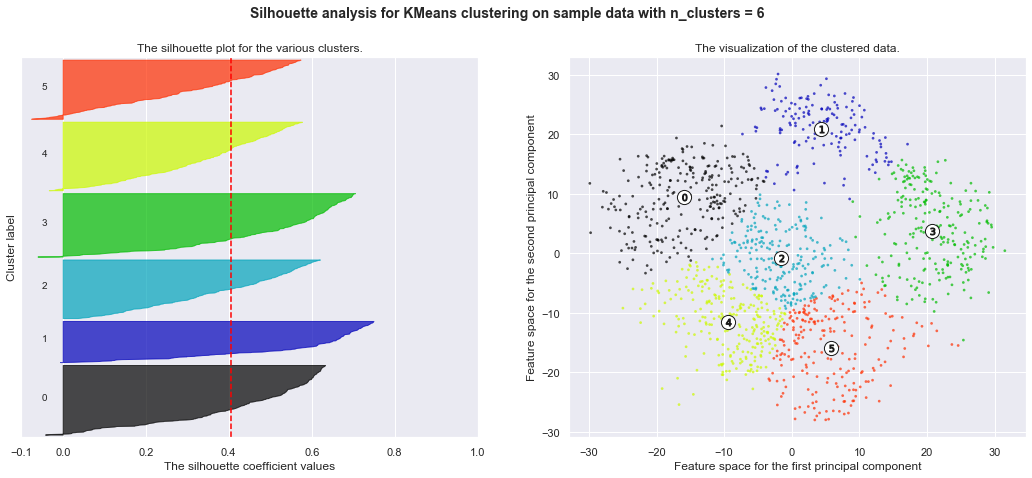

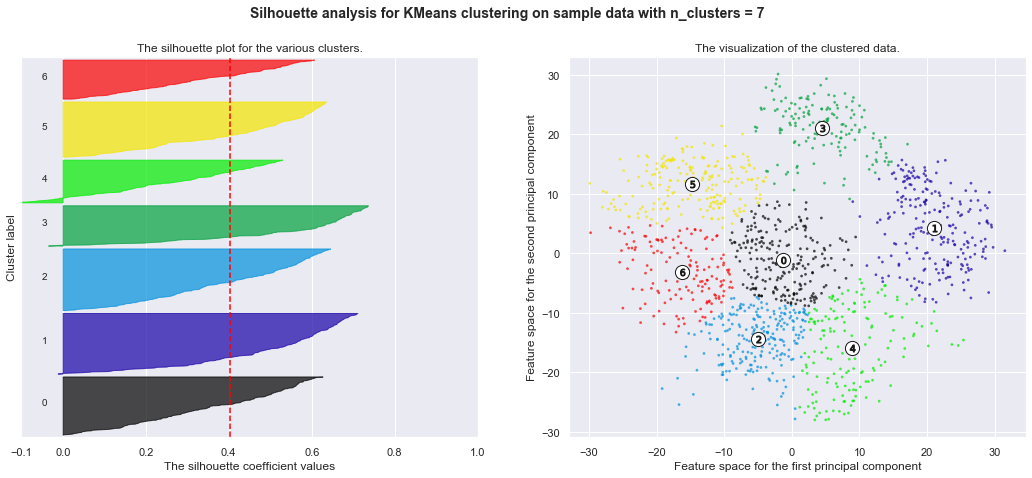

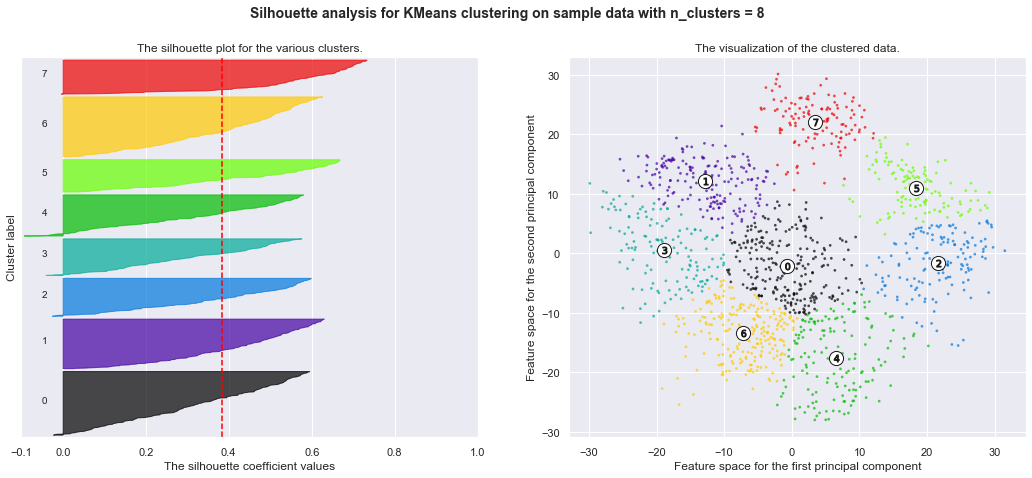

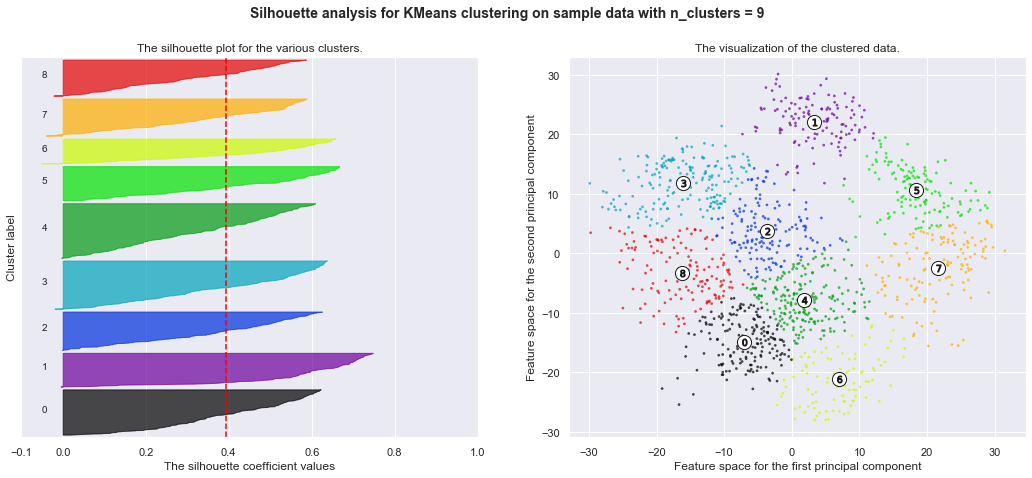

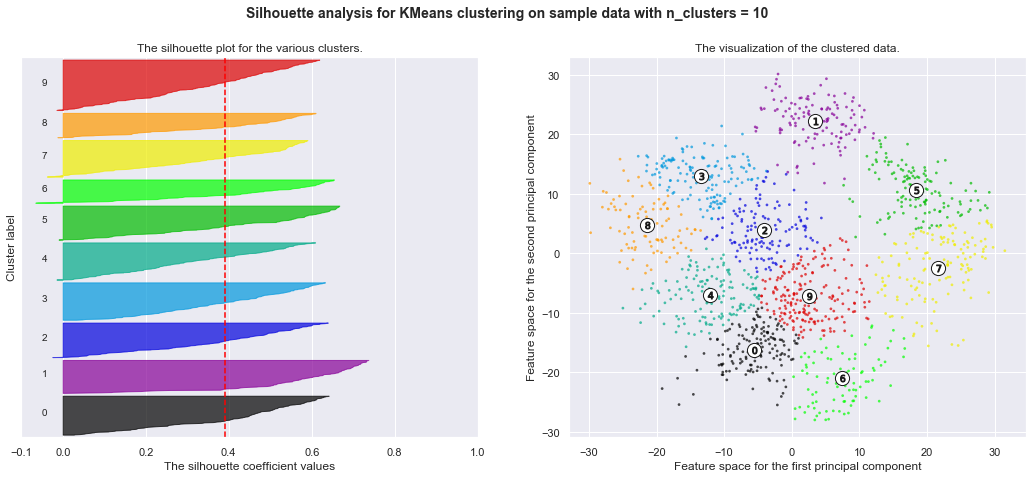

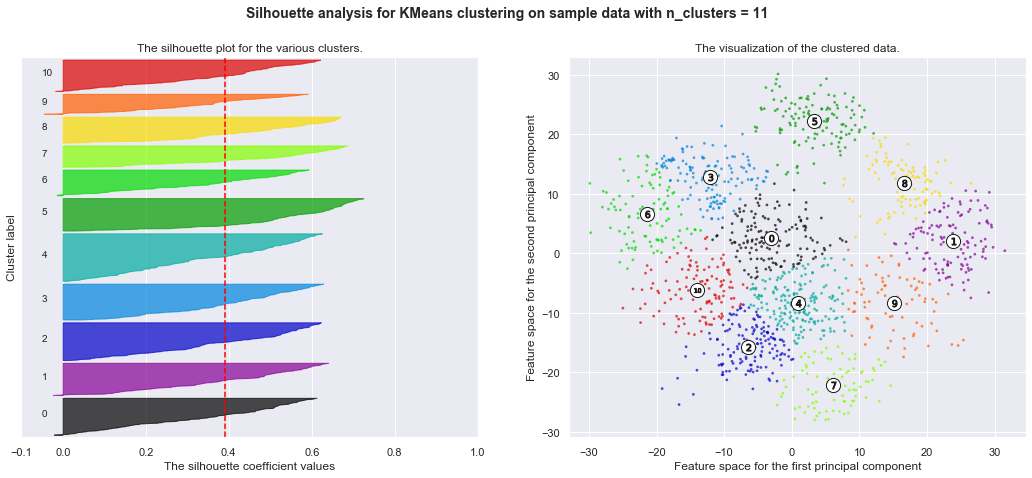

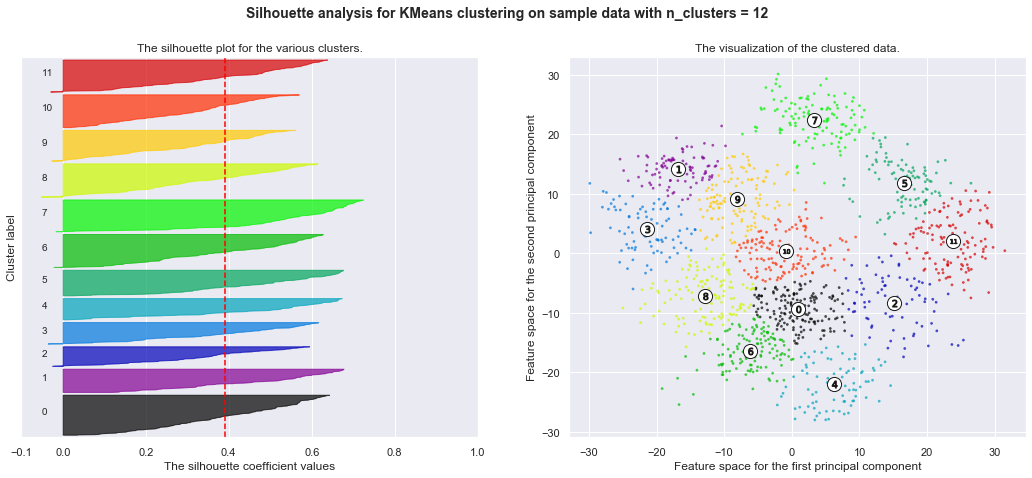

In [24]:
# Code from: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

for n_clusters in k_values:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train_2components) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train_2components)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train_2components, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_2components, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train_2components[:, 0], X_train_2components[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the first principal component")
    ax2.set_ylabel("Feature space for the second principal component")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()